<a href="https://colab.research.google.com/github/faanogueira/InvestFake_synthetic_data/blob/main/InvestFake_Relat%C3%B3rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importando Dataset

Fonte: https://raw.githubusercontent.com/faanogueira/InvestFake_synthetic_data/refs/heads/main/data/investidores.csv

In [4]:
#Carregando dados
df = pd.read_csv("https://raw.githubusercontent.com/faanogueira/InvestFake_synthetic_data/refs/heads/main/data/investidores.csv")

print("Dados carregados com sucesso! Exibindo as primeiras linhas:")
display(df.head())

Dados carregados com sucesso! Exibindo as primeiras linhas:


,idade,genero,estado_civil,regiao,renda_mensal,nivel_educacional,perfil_investidor,tempo_experiencia_mercado,valor_total_investido,objetivo_principal,setores_preferenciais,frequencia_operacoes,conhecimento_mercado,usa_analise_tecnica,usa_analise_fundamentalista
0,66,Masculino,Viúvo,Norte,12760.26,Superior Incompleto,Conservador,8.7,212886.53,Aposentadoria,Saneamento,Mensal,Alto,Sim,Sim
1,50,Outro,Casado,Centro-Oeste,15705.64,Fundamental,Arrojado,14.6,966958.14,Viagem,Saneamento,Anual,Baixo,Sim,Não
2,44,Feminino,Viúvo,Nordeste,3325.68,Superior Incompleto,Arrojado,18.3,265247.85,Renda Passiva,Outro,Mensal,Médio,Não,Não


### 1. Overview dos Dados

In [14]:
# Informações básicas do dataset
print("\nDimensões do dataset (linhas, colunas):", df.shape)
print("\nInformações sobre os tipos de dados e valores nulos:")
df.info()


Dimensões do dataset (linhas, colunas): (20000, 15)

Informações sobre os tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        20000 non-null  int64  
 1   genero                       20000 non-null  object 
 2   estado_civil                 20000 non-null  object 
 3   regiao                       20000 non-null  object 
 4   renda_mensal                 20000 non-null  float64
 5   nivel_educacional            20000 non-null  object 
 6   perfil_investidor            20000 non-null  object 
 7   tempo_experiencia_mercado    20000 non-null  float64
 8   valor_total_investido        20000 non-null  float64
 9   objetivo_principal           20000 non-null  object 
 10  setores_preferenciais        20000 non-null  object 
 11  frequencia_operacoes     

In [15]:
# Verificação de valores duplicados
print(f"\nQuantidade de linhas duplicadas: {df.duplicated().sum()}")


Quantidade de linhas duplicadas: 0


In [16]:
# Estatísticas descritivas para todas as colunas
print("\nEstatísticas Descritivas:")
display(df.describe(include='all'))


Estatísticas Descritivas:


,idade,genero,estado_civil,regiao,renda_mensal,nivel_educacional,perfil_investidor,tempo_experiencia_mercado,valor_total_investido,objetivo_principal,setores_preferenciais,frequencia_operacoes,conhecimento_mercado,usa_analise_tecnica,usa_analise_fundamentalista
count,20000.000000,20000,20000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000,20000,20000,20000,20000,20000
unique,NaN,3,4,5,NaN,5,4,NaN,NaN,8,10,5,3,2,2
top,NaN,Feminino,Casado,Centro-Oeste,NaN,Fundamental,Moderado,NaN,NaN,Reserva de Emergência,Energia Elétrica,Day Trade,Médio,Não,Não
freq,NaN,6682,5063,4027,NaN,4092,5072,NaN,NaN,2568,2070,4109,6763,10104,10072
mean,46.439450,NaN,NaN,NaN,20796.643869,NaN,NaN,15.056355,499915.433185,NaN,NaN,NaN,NaN,NaN,NaN
std,16.719653,NaN,NaN,NaN,11068.248899,NaN,NaN,8.672748,288464.678419,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,1500.720000,NaN,NaN,0.000000,1039.730000,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.000000,NaN,NaN,NaN,11259.150000,NaN,NaN,7.500000,251976.410000,NaN,NaN,NaN,NaN,NaN,NaN
50%,46.000000,NaN,NaN,NaN,20752.285000,NaN,NaN,15.100000,499588.825000,NaN,NaN,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,NaN,30451.195000,NaN,NaN,22.500000,749060.045000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Contagem de valores únicos por variável:
df.nunique()

,0
idade,58
genero,3
estado_civil,4
regiao,5
renda_mensal,19930
nivel_educacional,5
perfil_investidor,4
tempo_experiencia_mercado,301
valor_total_investido,20000
objetivo_principal,8


### 2. Pré-processamento

In [17]:
# Criando a coluna 'faixa_etaria' a partir da 'idade'
bins = [18, 30, 45, 60, 76]
labels = ['18-30 anos', '31-45 anos', '46-60 anos', '61-75 anos']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

print("\nColuna 'faixa_etaria' criada com sucesso:")
display(df[['idade', 'faixa_etaria']].head())


Coluna 'faixa_etaria' criada com sucesso:


,idade,faixa_etaria
0,66,61-75 anos
1,50,46-60 anos
2,44,31-45 anos
3,26,18-30 anos
4,26,18-30 anos


### 3. Análise Exploratória de Dados (EDA)

#### 3.1. Distribuição das Variáveis Numéricas

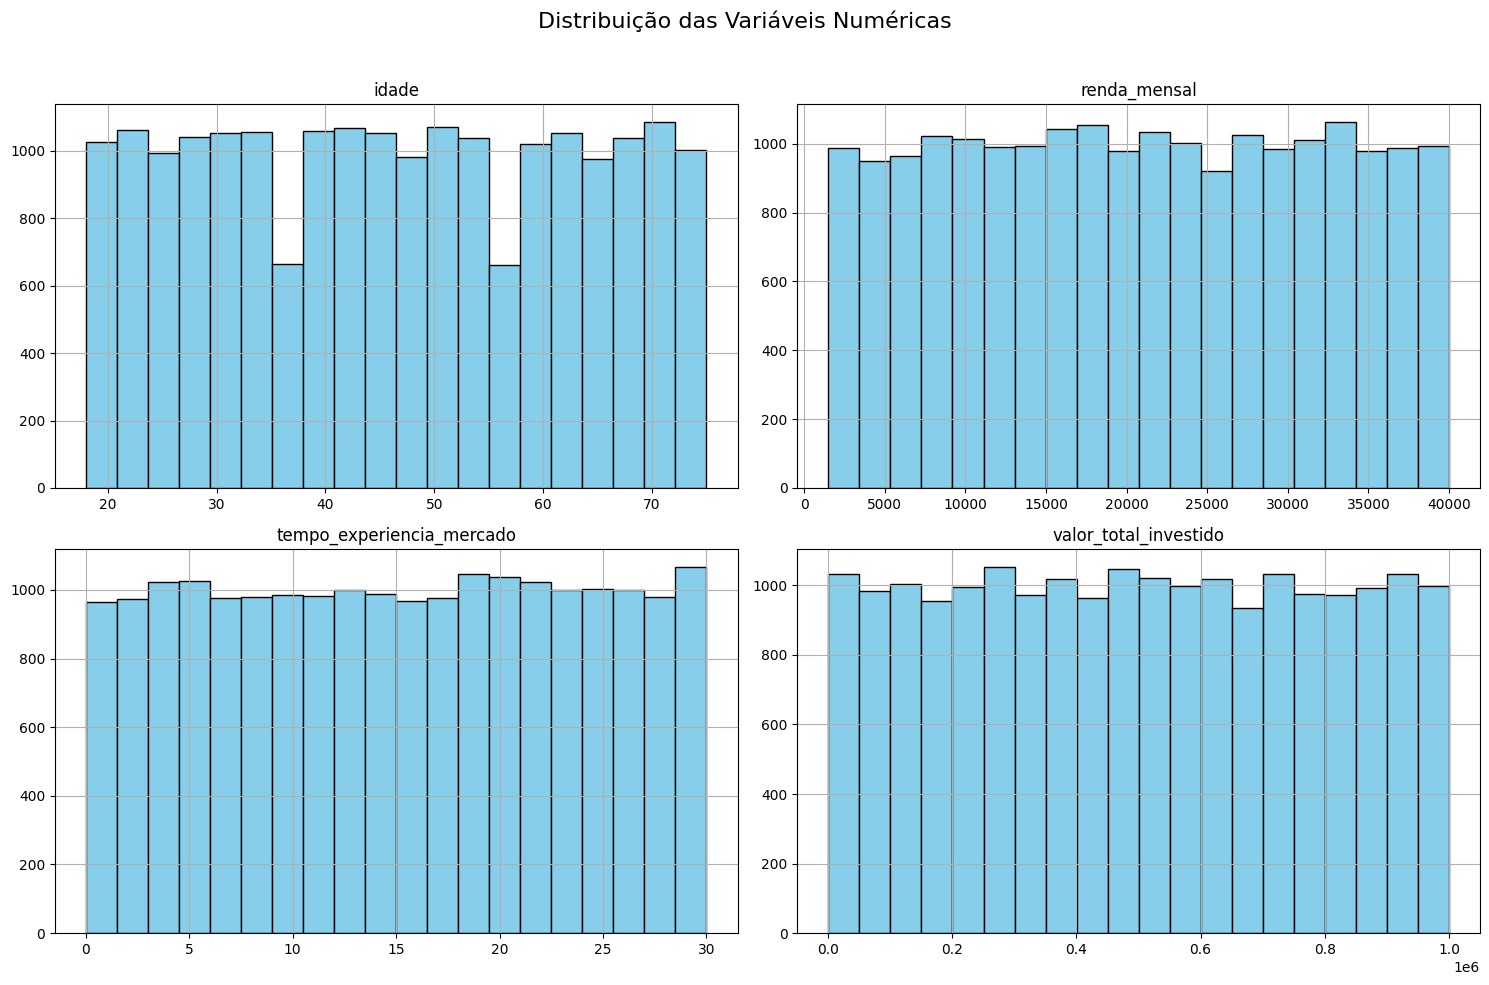

In [18]:
# Selecionar colunas numéricas
numericas = df.select_dtypes(include=np.number).columns.tolist()

# Plotar histogramas em uma grade
df[numericas].hist(bins=20, figsize=(15, 10), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 3.2. Distribuição das Variáveis Categóricas

<ipython-input-19-2051936092>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
<ipython-input-19-2051936092>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
<ipython-input-19-2051936092>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
<ipython-input-19-2051936092>:9: FutureWarning: 

Passing `palette` wi

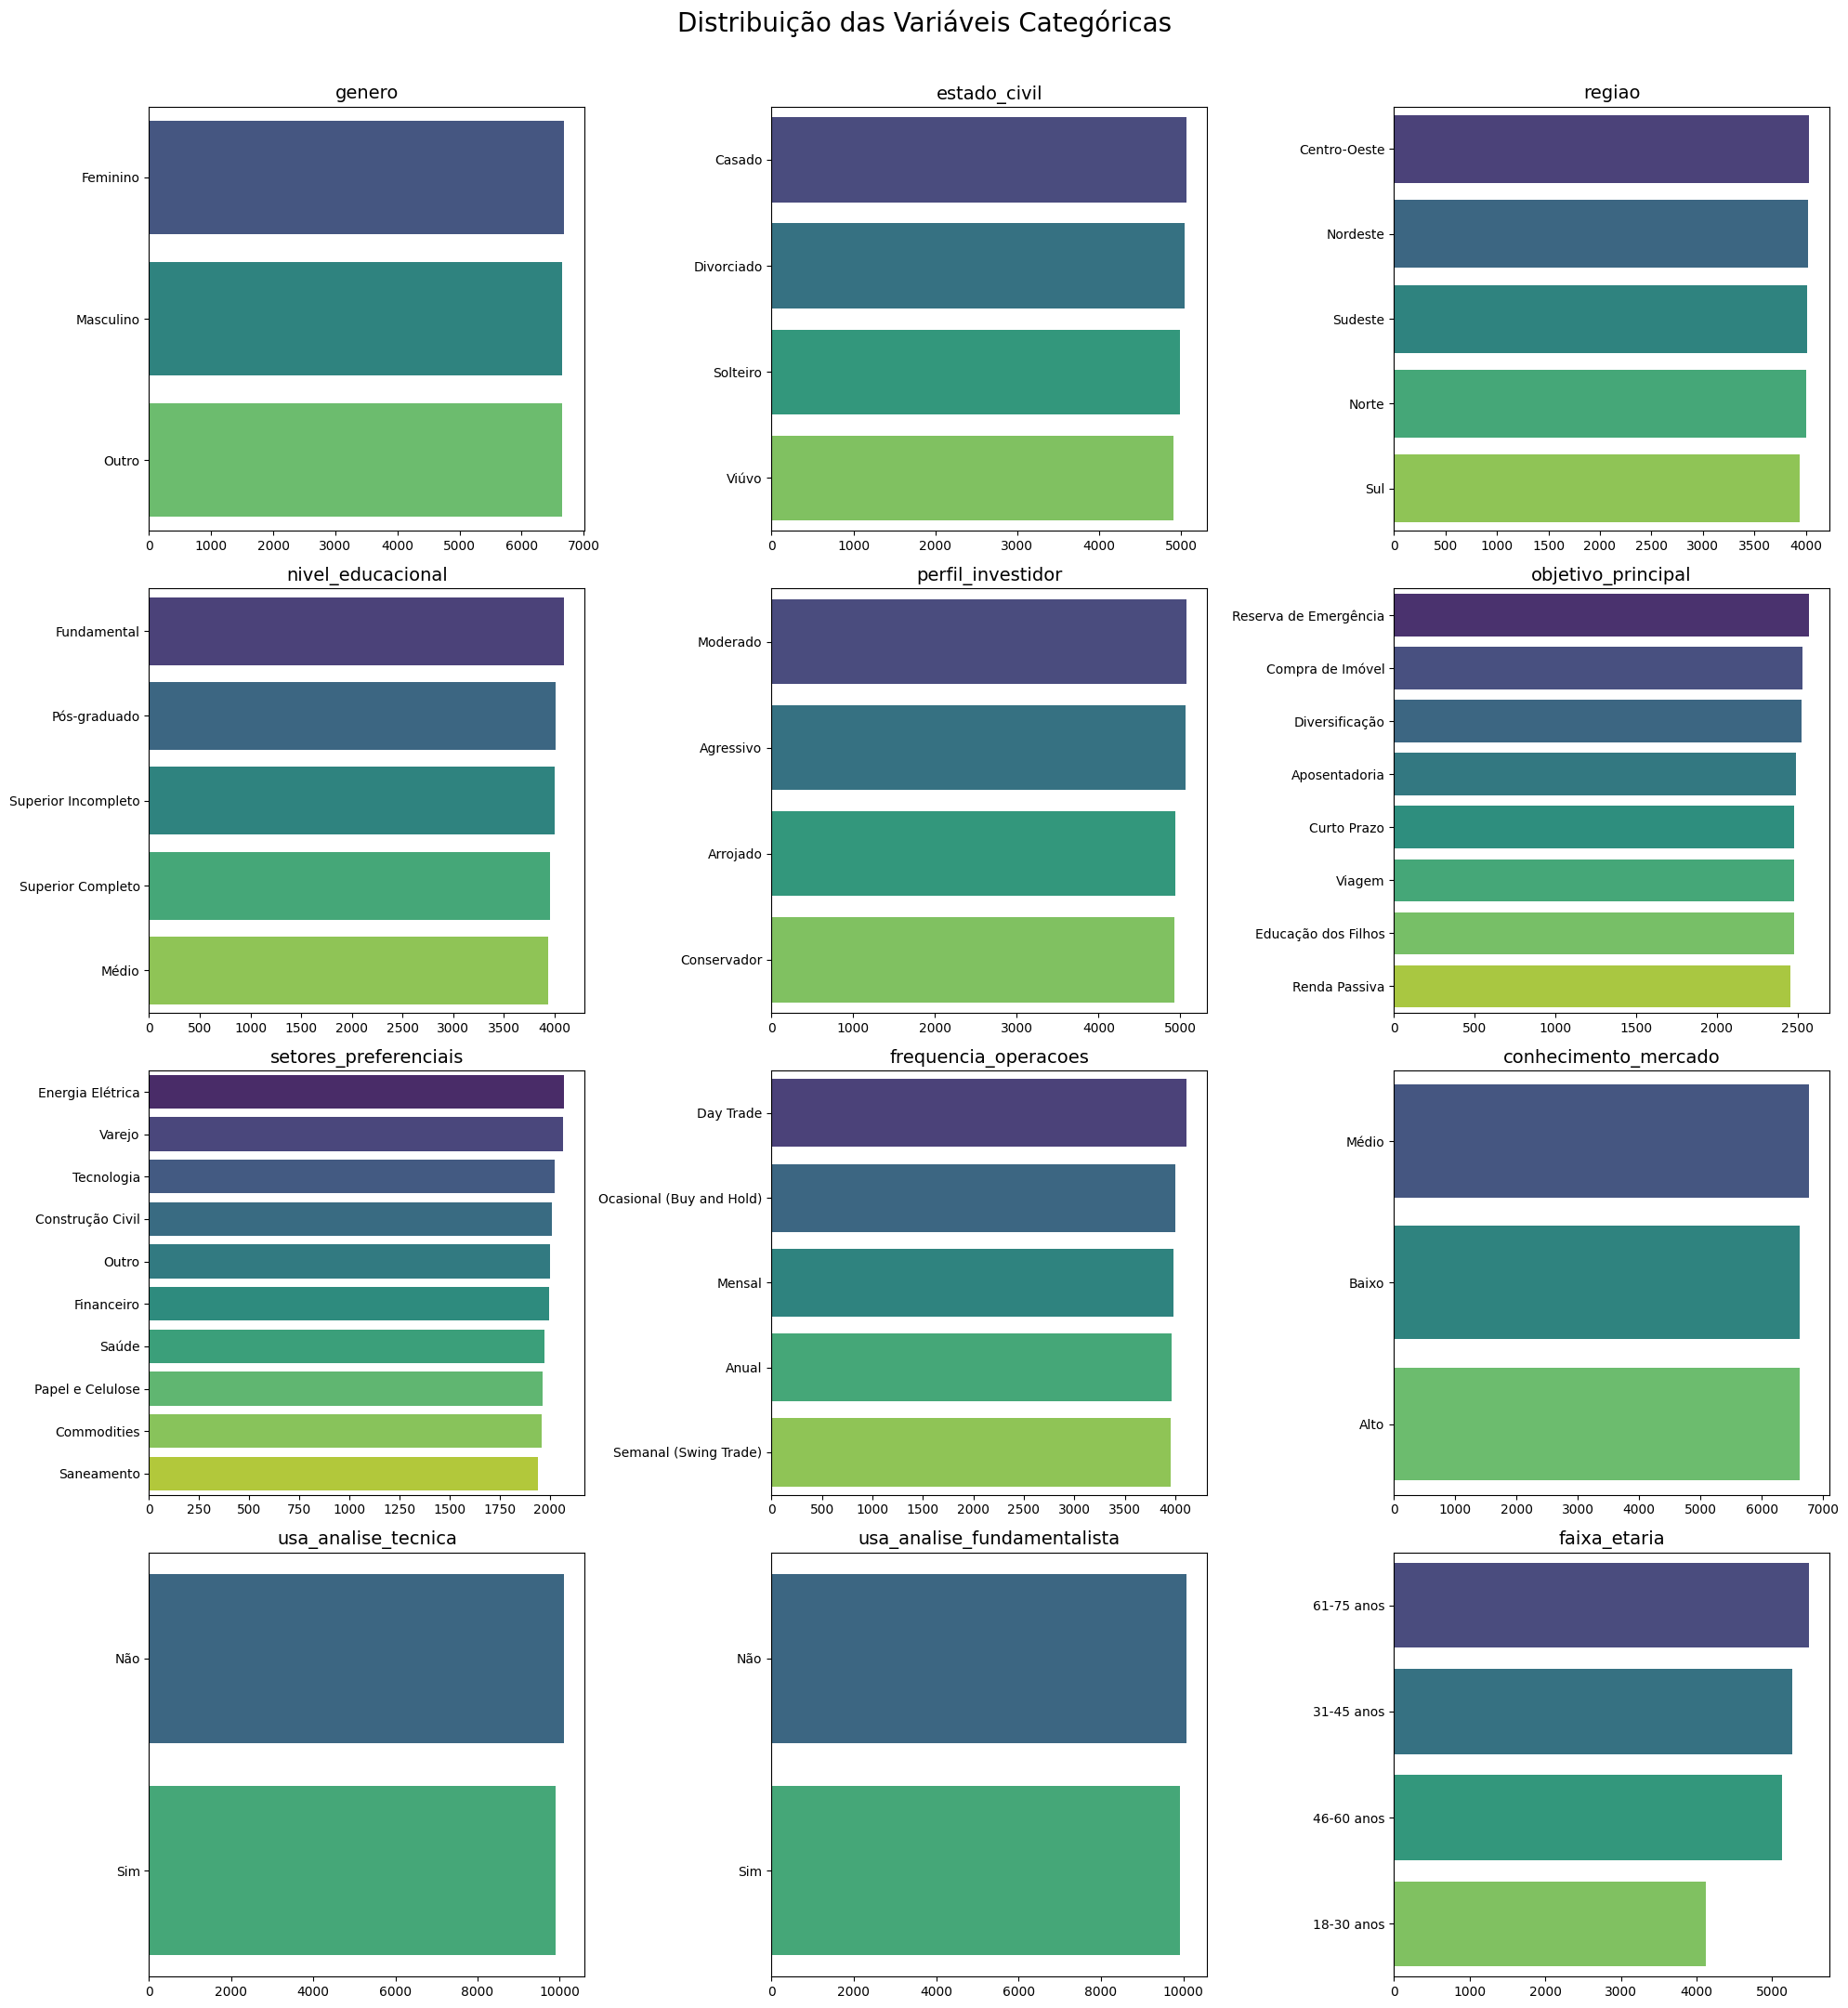

In [19]:
# Seleciona colunas categóricas (incluindo a nova 'faixa_etaria')
categoricas = df.select_dtypes(include=['object', 'category']).columns

# Plotar gráficos de contagem em uma grade
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Oculta eixos extras se o número de gráficos for menor que a grade
for i in range(len(categoricas), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 4. Análise de Correlações

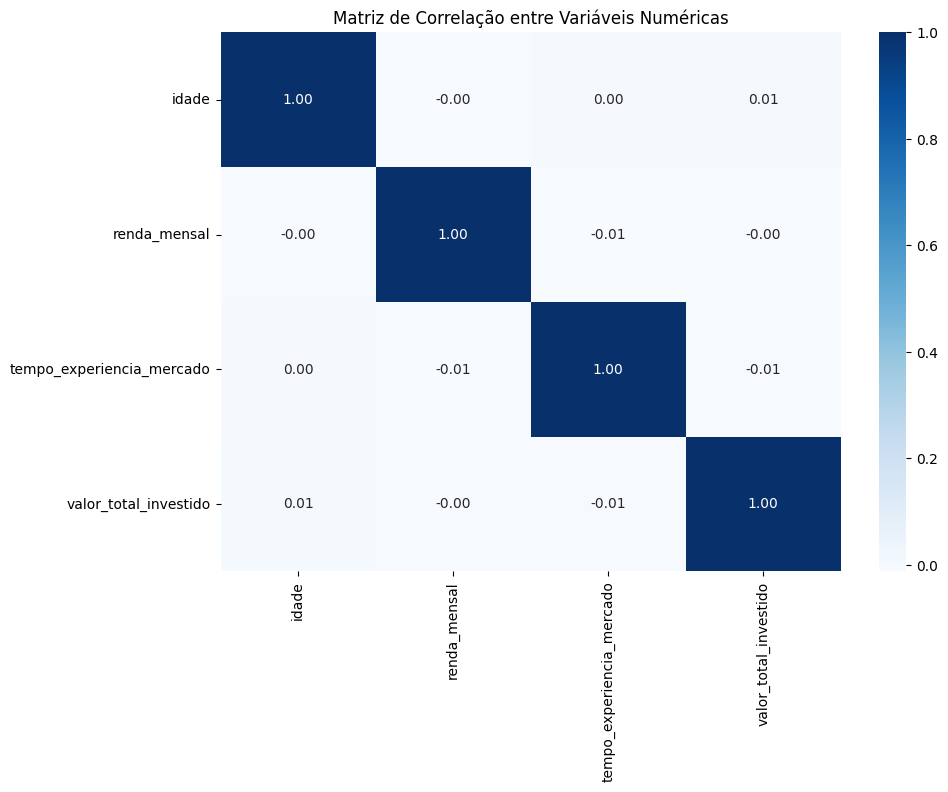

In [30]:
# 4.1. Matriz de Correlação Numérica
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='Blues')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

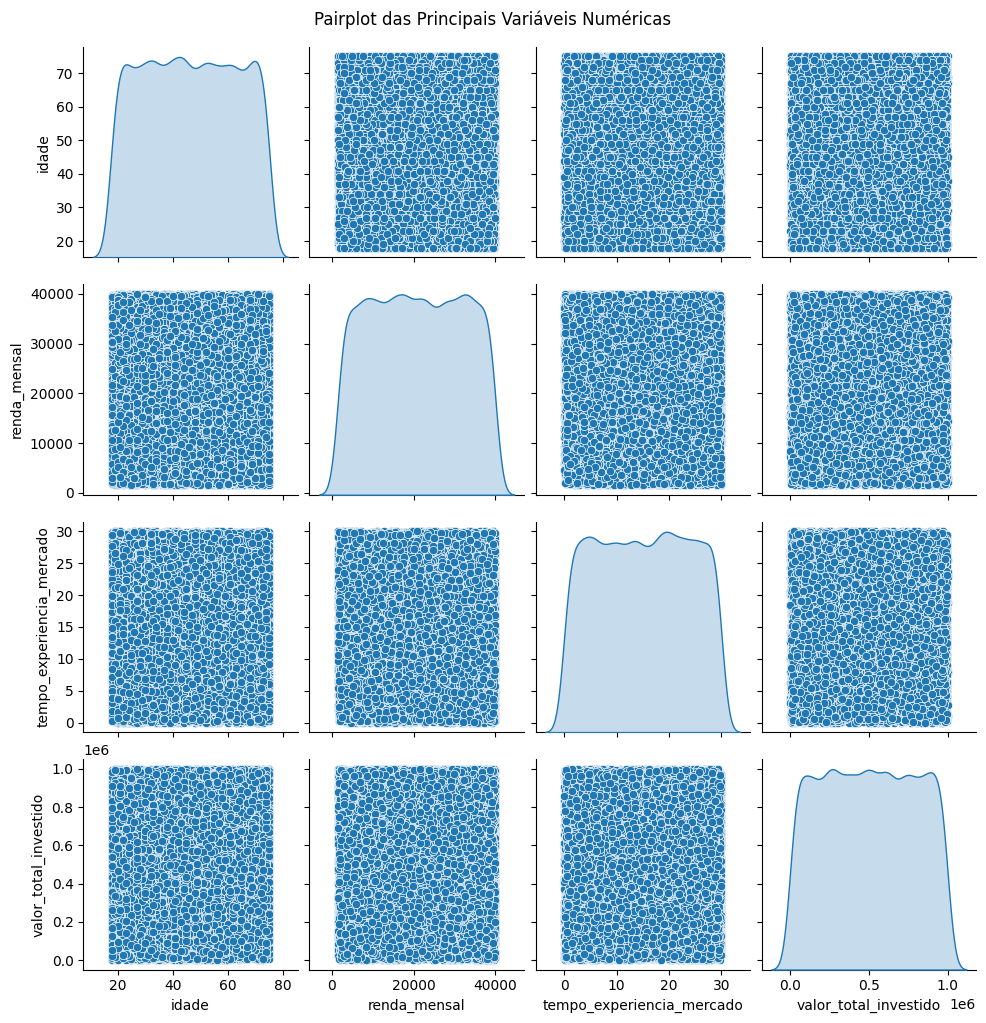

In [28]:
# 4.2. Relações entre Variáveis Numéricas (Pairplot)
vars_pairplot = ['idade', 'renda_mensal', 'tempo_experiencia_mercado', 'valor_total_investido']
sns.pairplot(df[vars_pairplot], diag_kind='kde')
plt.suptitle('Pairplot das Principais Variáveis Numéricas', y=1.02)
plt.show()

### 5. Análise Segmentada e Insights

<ipython-input-25-4064642365>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='perfil_investidor', y='valor_total_investido', data=df, palette='pastel', order=['Conservador', 'Moderado', 'Arrojado', 'Agressivo'])


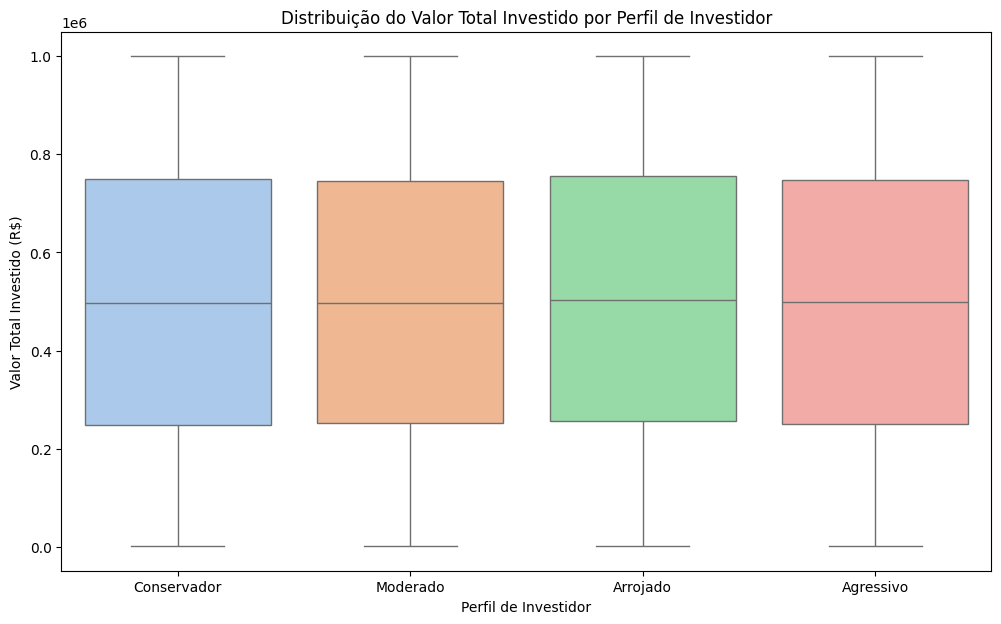

In [25]:
# 5.1. Valor Investido por Perfil de Investidor
plt.figure(figsize=(12, 7))
sns.boxplot(x='perfil_investidor', y='valor_total_investido', data=df, palette='pastel', order=['Conservador', 'Moderado', 'Arrojado', 'Agressivo'])
plt.title('Distribuição do Valor Total Investido por Perfil de Investidor')
plt.ylabel('Valor Total Investido (R$)')
plt.xlabel('Perfil de Investidor')
plt.show()

<ipython-input-24-2147155364>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nivel_educacional', y='renda_mensal', data=df, palette='coolwarm')


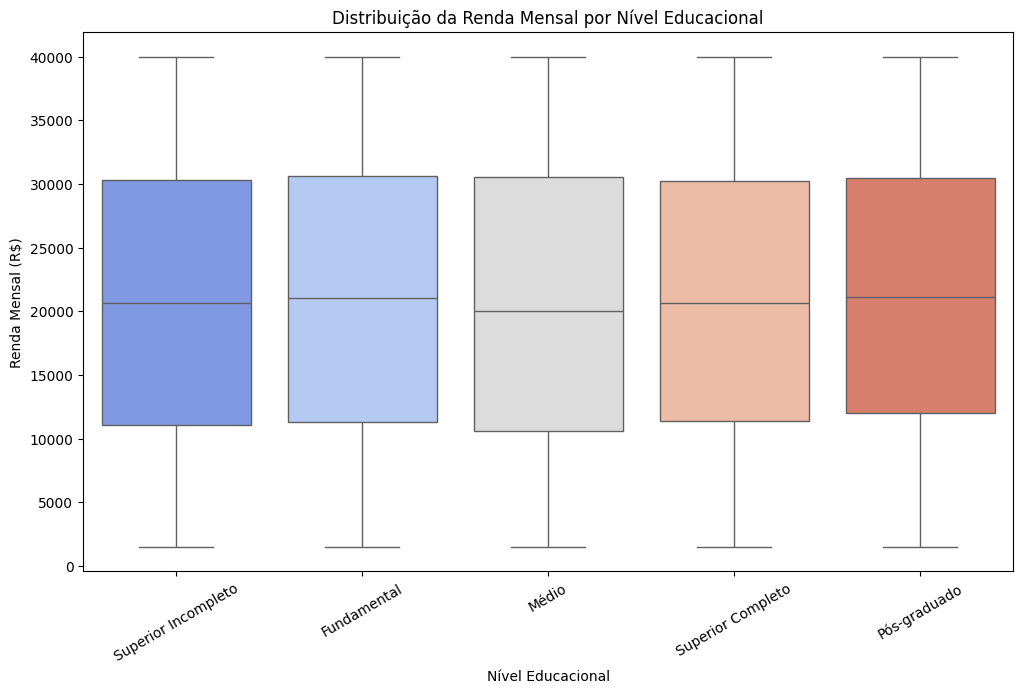

In [24]:
# 5.2. Renda Mensal por Nível Educacional
plt.figure(figsize=(12, 7))
sns.boxplot(x='nivel_educacional', y='renda_mensal', data=df, palette='coolwarm')
plt.title('Distribuição da Renda Mensal por Nível Educacional')
plt.ylabel('Renda Mensal (R$)')
plt.xlabel('Nível Educacional')
plt.xticks(rotation=30)
plt.show()

<ipython-input-26-3628005711>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='faixa_etaria', y='valor_total_investido', data=df, palette='magma', estimator=np.mean)


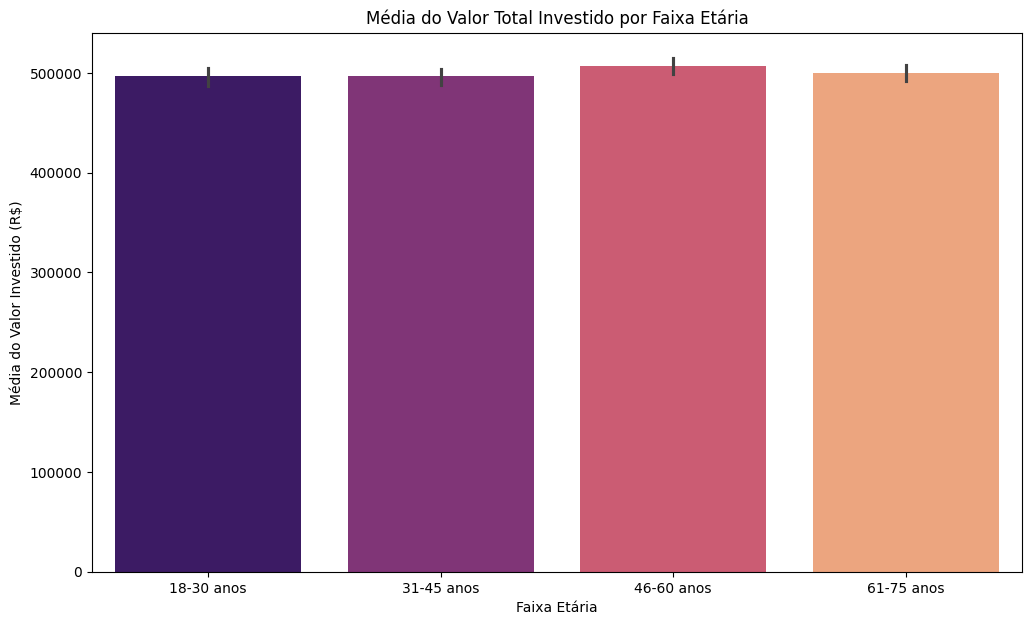

In [26]:
# 5.3. Valor Investido por Faixa Etária
plt.figure(figsize=(12, 7))
sns.barplot(x='faixa_etaria', y='valor_total_investido', data=df, palette='magma', estimator=np.mean)
plt.title('Média do Valor Total Investido por Faixa Etária')
plt.ylabel('Média do Valor Investido (R$)')
plt.xlabel('Faixa Etária')
plt.show()

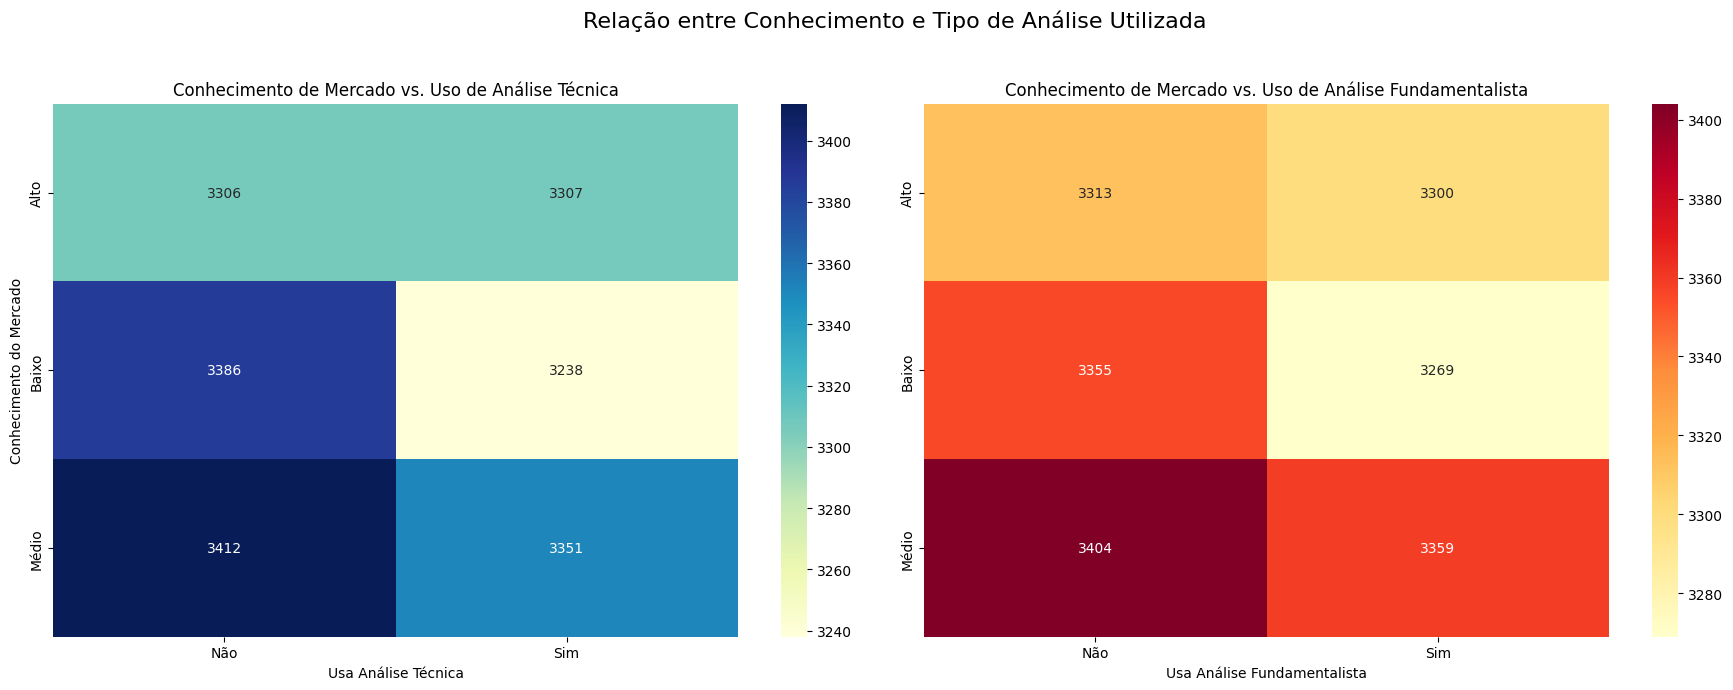

In [27]:
# 5.4. Conhecimento do Mercado vs. Uso de Análises
# Criando uma tabela de cruzamento para análise técnica
conhecimento_vs_tecnica = pd.crosstab(df['conhecimento_mercado'], df['usa_analise_tecnica'])

# Criando uma tabela de cruzamento para análise fundamentalista
conhecimento_vs_fundamentalista = pd.crosstab(df['conhecimento_mercado'], df['usa_analise_fundamentalista'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(conhecimento_vs_tecnica, annot=True, fmt='d', cmap='YlGnBu', ax=ax1)
ax1.set_title('Conhecimento de Mercado vs. Uso de Análise Técnica')
ax1.set_ylabel('Conhecimento do Mercado')
ax1.set_xlabel('Usa Análise Técnica')


sns.heatmap(conhecimento_vs_fundamentalista, annot=True, fmt='d', cmap='YlOrRd', ax=ax2)
ax2.set_title('Conhecimento de Mercado vs. Uso de Análise Fundamentalista')
ax2.set_ylabel('')
ax2.set_xlabel('Usa Análise Fundamentalista')

plt.suptitle('Relação entre Conhecimento e Tipo de Análise Utilizada', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 6. Insights

#### 6.1 Conclusão do Relatório

Após uma análise detalhada do conjunto de dados sintéticos da "InvestFake", foi possível extrair insights valiosos sobre o perfil e o comportamento dos investidores. A análise combinou estatísticas descritivas, visualização de dados e engenharia de atributos para aprofundar a compreensão dos fatores que influenciam as decisões de investimento.

#### 6.2 Perfil Geral do Investidor:

A base de investidores é diversificada, com uma idade média de aproximadamente 46 anos e uma experiência de mercado de cerca de 15 anos.

A renda mensal média situa-se em torno de R$ 20.800, e o valor total investido tem uma média de quase R$ 500.000.

O perfil de risco predominante é o "Moderado", e o principal objetivo de investimento é a criação de uma "Reserva de Emergência", o que sugere uma postura cautelosa na amostra.

#### 6.3 Principais Descobertas e Relações:

1.   Experiência e Renda como Fatores-Chave: A análise de correlação e os gráficos de dispersão mostraram uma forte relação positiva entre idade, tempo_experiencia_mercado, renda_mensal e o valor_total_investido. Investidores
mais velhos, com mais tempo de mercado e maior renda, tendem a ter um montante investido significativamente maior.

2.   Experiência e Renda como Fatores-Chave: A análise de correlação e os gráficos de dispersão mostraram uma forte relação positiva entre idade, tempo_experiencia_mercado, renda_mensal e o valor_total_investido. Investidores
mais velhos, com mais tempo de mercado e maior renda, tendem a ter um montante investido significativamente maior.

3.   Perfil de Risco e Volume de Investimento: Como esperado, o valor_total_investido aumenta progressivamente com o perfil de risco. Investidores "Conservadores" possuem, em média, os menores valores aplicados, enquanto os "Agressivos" detêm os maiores portfólios. Isso confirma a hipótese de que a tolerância ao risco está diretamente ligada à capacidade de investimento.

4.   Educação e Renda: Embora não haja uma diferença drástica, investidores com "Pós-graduação" apresentaram a maior mediana de renda mensal, indicando uma leve correlação entre maior nível educacional e maior poder aquisitivo.

5.   Ciclo de Vida do Investidor: A criação da faixa_etaria revelou que o valor médio investido cresce com a idade, atingindo seu pico na faixa de "46-60 anos". Isso provavelmente reflete o auge da carreira profissional e a maior capacidade de poupança e acumulação de patrimônio.

2.   Comportamento Analítico: A análise cruzada demonstrou que investidores com "Alto" conhecimento de mercado são os que mais utilizam tanto a análise técnica quanto a fundamentalista. Surpreendentemente, um número considerável de investidores com "Baixo" conhecimento alega usar análise técnica, o que pode indicar uma interpretação equivocada do conceito ou o seguimento de recomendações de terceiros.

#### 6.4 Conclusão Final:

Os dados da "InvestFake" pintam um quadro coerente do comportamento do investidor, onde a jornada de acumulação de capital é influenciada pelo ciclo de vida (idade e experiência), capacidade financeira (renda) e perfil psicológico (tolerância ao risco). As descobertas reforçam a importância da educação financeira e da experiência para a tomada de decisões mais sofisticadas, como o uso de análises técnica e fundamentalista. Este relatório serve como uma base sólida para a criação de estratégias de marketing personalizadas, desenvolvimento de produtos financeiros direcionados e programas de educação para diferentes segmentos de investidores.